## 2. MEASURES OF DISPERSION

So far we have described and summarized our data by measuring how our dataset is distributed in terms of frequency. In this section, we will look at how, or rather where, certain observations or data points are located. We will consider 3 main concepts to explore the spread of our data, namely:

* Range and interquartile range
* Variance
* Standard deviation

Let's start with range and interquartile range.

### 2.1 Range and Interquartile Range

**The range** indicates the space between the minimum and maximum values in a dataset. In other words, it describes the difference between the lowest and highest observations. On its own, range does not disclose a lot of information about data. 



**Interquartile range (IR)** refers to 25th and 75th percentile of the dataset. Imagine our dataset as neatly divided into 100 pieces ('percentile'). 25th quartile is also known as the 1st quartile, as it describes the observations that fall into the first quarter of our dataset. 75th quartile, or the 3rd quartile, hosts the observations that are in the 3rd quartile of the dataset. The are between the 1st and 3rd quartile, the 50 percent of the data that is right in the middle of the dataset describe the interquartile range. Median is located inside the IR. It is, in fact, the value that corresponds to the 50th percentile. 


While we can easily compute these values using a few lines of code, it is always useful to visualize this as a graph, and boxplots is one of the most useful ways of displaying the quartiles and percentiles of data that consists of numeric values.

In the following code, we will look at age-wage gap for European countries, including the majority of the EU27, and examine the spread of the data. First we will look at the difference between wage gap across different age groups (in our case, seniors over prime-age population) between __women__ and __men__ based on 2018 data, which has 28 observations.



### Fetching & cleaning the data

In [1]:
import sys
import os
import getpass
import pandas as pd
import numpy as np
import math

if getpass.getuser() == 'simon':
    functionFolder = 'C:/Users/simon/Desktop/github_projects/hands_on_statistics/zz_help_functions/'
else:
    functionFolder = '/Users/tugbasabanoglu/Desktop/hands_on_statistics/'

sys.path.insert(1, functionFolder)
from database_connection_functions import get_from_oecd


In [2]:
data = get_from_oecd("AGE_GAP")


In [3]:
df = pd.DataFrame(data)


In [4]:
df

,COUNTRY,Country,SEX,Sex,SERIES,Series,AGE,Age,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,1980,1980,25.092421,NaN,NaN
1,AUS,Australia,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,1984,1984,25.047319,NaN,NaN
2,AUS,Australia,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,1985,1985,24.822064,NaN,NaN
3,AUS,Australia,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,1986,1986,26.227285,NaN,NaN
4,AUS,Australia,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,1987,1987,27.286663,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2018,2018,31.660693,NaN,NaN
6744,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2019,2019,31.161137,NaN,NaN
6745,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2020,2020,30.769231,NaN,NaN
6746,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2021,2021,30.496454,NaN,NaN


In [5]:
countries = ('Austria', 'Belgium', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 
             'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Luxembourg',
             'Netherlands', 'Norway', 'Poland', 'Portugal',
             'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 
             'Slovenia', 'Estonia', 'Lithuania', 'Latvia', 
             'Romania', 'Malta', 'Bulgaria', 'Cyprus', 'Croatia', 'Malta', 'Turkey')

In [6]:
filtered_df = df[df['Country'].isin(countries)]


In [7]:
filtered_df


,COUNTRY,Country,SEX,Sex,SERIES,Series,AGE,Age,TIME,Time,Value,Flag Codes,Flags
91,AUT,Austria,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,2002,2002,29.806714,NaN,NaN
92,AUT,Austria,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,2006,2006,31.181319,NaN,NaN
93,AUT,Austria,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,2010,2010,32.268632,NaN,NaN
94,AUT,Austria,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,2014,2014,30.966543,NaN,NaN
95,AUT,Austria,W,Women,MEAN,Mean,YOUTH,Youth over Prime-age,2018,2018,30.527984,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2018,2018,31.660693,NaN,NaN
6744,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2019,2019,31.161137,NaN,NaN
6745,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2020,2020,30.769231,NaN,NaN
6746,CHE,Switzerland,T,Total,MEDIAN,Median,YOUTH,Youth over Prime-age,2021,2021,30.496454,NaN,NaN


In [8]:
unique_age = filtered_df['Age'].unique()
unique_sex = filtered_df['Sex'].unique()
unique_years = filtered_df['Time'].unique()


In [9]:
df2 = filtered_df[(filtered_df['Series'] == 'Mean') & (filtered_df['Age'] == 'Senior over Prime-age')]



In [10]:
df2

,COUNTRY,Country,SEX,Sex,SERIES,Series,AGE,Age,TIME,Time,Value,Flag Codes,Flags
2865,ISL,Iceland,W,Women,MEAN,Mean,SENIOR,Senior over Prime-age,2002,2002,11.022928,NaN,NaN
2866,ISL,Iceland,W,Women,MEAN,Mean,SENIOR,Senior over Prime-age,2006,2006,6.921241,NaN,NaN
2867,ISL,Iceland,W,Women,MEAN,Mean,SENIOR,Senior over Prime-age,2010,2010,2.709907,NaN,NaN
2868,ISL,Iceland,W,Women,MEAN,Mean,SENIOR,Senior over Prime-age,2014,2014,1.549621,NaN,NaN
2869,ISL,Iceland,W,Women,MEAN,Mean,SENIOR,Senior over Prime-age,2018,2018,-5.000950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,HRV,Croatia,M,Men,MEAN,Mean,SENIOR,Senior over Prime-age,2014,2014,-7.645535,NaN,NaN
6503,HRV,Croatia,M,Men,MEAN,Mean,SENIOR,Senior over Prime-age,2018,2018,-1.381002,NaN,NaN
6504,HRV,Croatia,T,Total,MEAN,Mean,SENIOR,Senior over Prime-age,2010,2010,-22.527454,NaN,NaN
6505,HRV,Croatia,T,Total,MEAN,Mean,SENIOR,Senior over Prime-age,2014,2014,-9.687756,NaN,NaN


In [11]:
df2 = df2[['Country', 'Sex', 'Time', 'Value']].dropna()
df2['Value'] = pd.to_numeric(df2['Value'], errors='coerce')
df2 = df2.dropna(subset=['Value'])

In [12]:
df2

,Country,Sex,Time,Value
2865,Iceland,Women,2002,11.022928
2866,Iceland,Women,2006,6.921241
2867,Iceland,Women,2010,2.709907
2868,Iceland,Women,2014,1.549621
2869,Iceland,Women,2018,-5.000950
...,...,...,...,...
6502,Croatia,Men,2014,-7.645535
6503,Croatia,Men,2018,-1.381002
6504,Croatia,Total,2010,-22.527454
6505,Croatia,Total,2014,-9.687756


### Computing the range, finding IR, and visualizing the data as boxplot

In [13]:
year_of_interest = 2018
df2_year = df2[df2['Time'] == year_of_interest]


# compute the 'range' of the dataset using min and max values
min_value = df2_year['Value'].min() # min value
max_value = df2_year['Value'].max() # max value
range_df2 = max_value - min_value

print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Range of this data sample is:", range_df2)

Minimum value: -28.4044248997643
Maximum value: 25.4315779184517
Range of this data sample is: 53.836002818216


In [14]:
# computing the 'interquartile range' of the dataset
q1 = np.percentile(df2_year['Value'], 25) # 25th percentile
q3 = np.percentile(df2_year['Value'], 75)# 75th percentile

print("1st quartile (25th percentile):", q1)
print("3rd quartile (75th percentile):", q3)

1st quartile (25th percentile): -15.192594359186925
3rd quartile (75th percentile): 2.8889019784492325


In [15]:
# import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

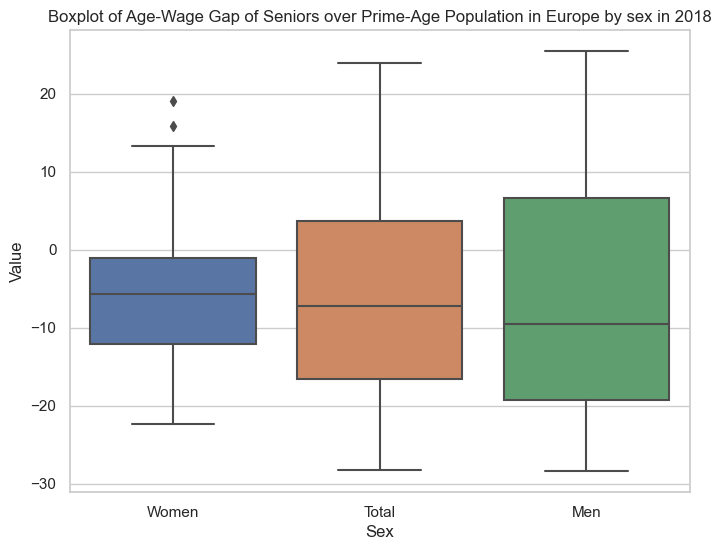

In [16]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create box plots for each sex for the year 2018
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Value', data=df2_year)
plt.title('Boxplot of Age-Wage Gap of Seniors over Prime-Age Population in Europe by sex in 2018')
plt.xlabel('Sex')
plt.ylabel('Value')
plt.show()

**Interpretation:** 
Data shows the wage-gap between senior and prime age wage earners in 32 European countries in 2018. Negative percentage values suggest that this age group earned x percent more than their younger counterparts. Similarly, a positive value means that senior workers earned x percent less.

Comparing the median values for each gender, median wage gap as a percentage over younger wage earners was lower at around -6 percent for women, whereas for men this value was approximately -9 percent. This suggests that, older men  earned more than the older women on average (median) in comparison to prime-age wage earners of the corresponding gender. 

Looking at the size of the boxes - the area that represents the values between the 25th and 75th percentile, wage gap for men is more dispersed than women's. There is less variability for women wage-earners with maximum value around roughly 13 percent, however, for women, there are outliers, or extreme cases in the data. In some countries, senior men earned as much as 20 percent more than younger people. 

### 2.2 Variance

Variance is used to measure the relationship between each data point and the center of the dataset, the mean. It tells us how far an observation falls from the mean of the dataset, thus giving us information how spread out or close together the data points in the set are. Variance (of a sample) is calculated by summing the difference between an observation from the mean of the dataset, and dividing it by _n - 1_ - sample size minus one - if we're interested in finding out the sample variance. The resulting sum is the average of the difference from the mean, and we square this figure to arrive at the variance. Squaring is necessary to prevent values above the mean from evening out the values below the mean. By squaring we also ensure that all values are positive. Variance is calculated using the following formula:

$s^2= \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

Let's piece apart the formula step by step.

* First, we find the difference between each observation from the mean of the distribution and sum them all up.
* Then, we find the average of this difference by dividing the sum by _n - 1_
* Lastly, we square the resulting figure to arrive at the variance of the distribution.

And, let us go back to our data and find the variance in the age-wage gap in EU countries.


In [17]:
# method 1: create a custom function to calculate variance
# function to calculate the mean
def mean(data):
    return sum(data) / len(data)


# function to calculate variance
def variance(data, ddof = 0):
    m = mean(data)
    return sum((x - m) ** 2 for x in data) / (len(data) - ddof)

In [18]:
mean(df2_year['Value'])

-5.804097383595472

**Interpretation:** The mean result we got tells us on average, seniors earned about 6% more than the prime-age workers in 2016.

In [19]:
variance(df2_year['Value'], ddof=1)

177.93973677875988

In [20]:
# method 2: using the var function from the numpy library
variance2 = df2_year['Value'].var()
variance2

177.93973677875988

### 2.3 Standard Deviation

Standard deviation and variance are closely linked together. In fact, they measure pretty much the same thing: the variance in the spread of the data in terms of distance to and from the mean value. While variance measures this by using absolute values, standard deviation is the standardized expression of the same concept. We can think of standard deviation as boxes as neatly grouping observations based on their distance to the mean value of the distribution.

Standard deviation (_s_) is calculated by simply taking the squared root of variance with this simple formula: $$ \sqrt{s^2} $$

Now let's go back to our dataset to see how the distribution is spread in terms of standard deviation.

In [21]:
# calculating the standard deviation using the variance function we created before
stan_dev = math.sqrt(variance2)
stan_dev

13.339405413239373

In [22]:
# calculating the standard deviation using the sd function in the numpy package
stan_dev2 = np.std(df2_year['Value'], ddof=1)
stan_dev2

13.339405413239373

**Interpretation:** The standard deviation of our distribution tells us that 68 percent of senior-age individuals' earnings in European countries is 13 percent more or less than the expected value (mean) over a prime-age wage earner. The figure 68 percent comes from normal distribution, which we will talk about later. For the time being, suffice it to say that 68 percent of data points corresponds to 1 standard deviation around the mean.